In [19]:
# numpy
import numpy as np

# pandas stuff
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# plotting stuff
from pandas.plotting import lag_plot
import matplotlib.pyplot as plt
import seaborn as sns
colorMap = sns.light_palette("blue", as_cmap=True)

#keep this badboy running
import gc  

In [2]:
df = pd.read_csv("./jane-street-market-prediction/train.csv")

In [25]:
df = df[df.weight != 0]

In [27]:
df.describe()

,date,weight,resp_1,resp_2,resp_3,resp_4,resp,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,feature_80,feature_81,feature_82,feature_83,feature_84,feature_85,feature_86,feature_87,feature_88,feature_89,feature_90,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99,feature_100,feature_101,feature_102,feature_103,feature_104,feature_105,feature_106,feature_107,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,feature_116,feature_117,feature_118,feature_119,feature_120,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,ts_id
count,1.981287e+06,1.981287e+06,1.981287e+06,1.981287e+06,1.981287e+06,1.981287e+06,1.981287e+06,1.981287e+06,1.981287e+06,1.981287e+06,1.980869e+06,1.980869e+06,1.981287e+06,1.981287e+06,1.667805e+06,1.667805e+06,1.980715e+06,1.980715e+06,1.919184e+06,1.919184e+06,1.969997e+06,1.969997e+06,1.976299e+06,1.976299e+06,1.665997e+06,1.665997e+06,1.980715e+06,1.980715e+06,1.918186e+06,1.918186e+06,1.969997e+06,1.969997e+06,1.976299e+06,1.976299e+06,1.665997e+06,1.665997e+06,1.980715e+06,1.980715e+06,1.918186e+06,1.918186e+06,1.969997e+06,1.969997e+06,1.976299e+06,1.976299e+06,1.981287e+06,1.981287e+06,1.981287e+06,1.981287e+06,1.981287e+06,1.981287e+06,1.981287e+06,1.980869e+06,1.980869e+06,1.981287e+06,1.981287e+06,1.981287e+06,1.981287e+06,1.981287e+06,1.981287e+06,1.981287e+06,1.981287e+06,1.981287e+06,1.928688e+06,1.980568e+06,1.981287e+06,1.981286e+06,1.981239e+06,1.981287e+06,1.981287e+06,1.981287e+06,1.981287e+06,1.981287e+06,1.981287e+06,1.981287e+06,1.981287e+06,1.981287e+06,1.981287e+06,1.981287e+06,1.981287e+06,1.701448e+06,1.980715e+06,1.931537e+06,1.969997e+06,1.976299e+06,1.981287e+06,1.701448e+06,1.980715e+06,1.931537e+06,1.969997e+06,1.976299e+06,1.981287e+06,1.701448e+06,1.980715e+06,1.931537e+06,1.969997e+06,1.976299e+06,1.981287e+06,1.701448e+06,1.980715e+06,1.931537e+06,1.969997e+06,1.976299e+06,1.981287e+06,1.701448e+06,1.980715e+06,1.931537e+06,1.969997e+06,1.976299e+06,1.981287e+06,1.701448e+06,1.980715e+06,1.931537e+06,1.969997e+06,1.976299e+06,1.981287e+06,1.701448e+06,1.980715e+06,1.931537e+06,1.969997e+06,1.976299e+06,1.981287e+06,1.701448e+06,1.980715e+06,1.931537e+06,1.969997e+06,1.976299e+06,1.981287e+06,1.927479e+06,1.927479e+06,1.981139e+06,1.981139e+06,1.969414e+06,1.969414e+06,1.974795e+06,1.974795e+06,1.979918e+06,1.979918e+06,1.981287e+06
mean,2.526263e+02,3.657652e+00,1.519922e-04,2.124634e-04,3.074072e-04,5.020192e-04,4.721902e-04,5.960267e-03,5.035693e-01,4.236199e-01,-8.212797e-03,-1.761483e-02,-1.350027e-02,-2.823279e-02,5.769690e-02,1.853596e-02,3.604272e-01,2.126628e-01,1.108382e-01,5.936487e-02,2.012462e-01,1.062057e-01,2.837418e-01,1.865640e-01,1.240066e-01,1.039035e-01,2.943221e-01,2.454616e-01,1.968223e-01,1.708081e-01,2.582749e-01,2.238199e-01,2.931463e-01,2.482951e-01,1.454661e-01,1.692126e-01,3.204688e-01,3.194948e-01,2.347361e-01,2.620468e-01,3.203934e-01,3.365816e-01,3.403784e-01,3.489532e-01,1.870209e-02,2.796509e-03,4.022217e-02,4.805622e-02,3.334506e-01,5.594939e-01,4.916164e-01,4.246636e-01,3.463117e-01,

### Resp

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



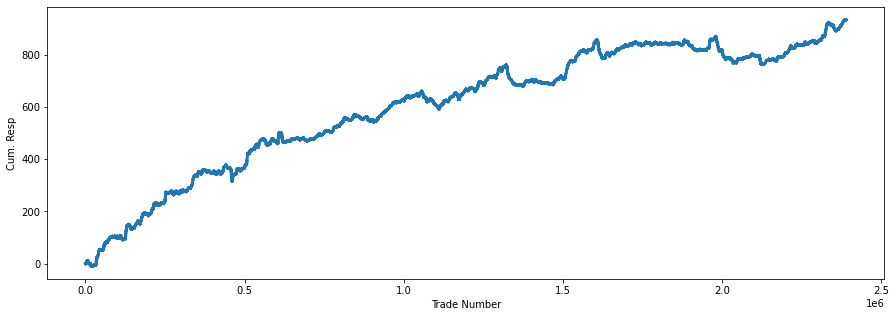

In [28]:
# plot the cumulative resp value (wtf is resp?)
fig, ax = plt.subplots(figsize = (15,5))
resp_value = pd.Series(df['resp']).cumsum()
print(resp_value)
ax.set_xlabel("Trade Number")
ax.set_ylabel("Cum. Resp")
resp_value.plot(lw=3);
del resp_value
gc.collect();

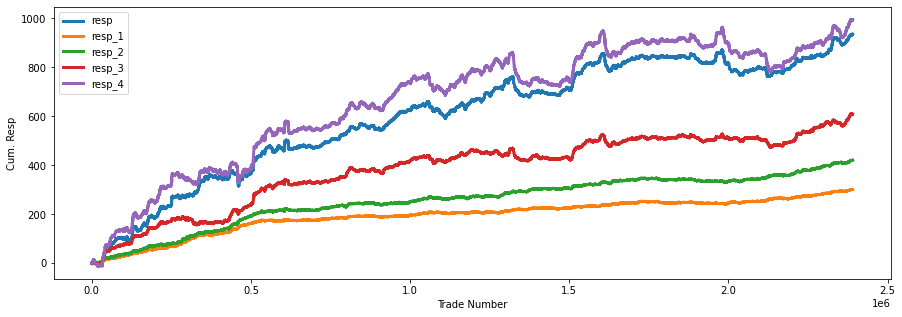

In [30]:
# same plot as before except each of the resp values are plotted seperately
fig, ax = plt.subplots(figsize=(15, 5))
balance = pd.Series(df['resp']).cumsum()
resp_1= pd.Series(df['resp_1']).cumsum()
resp_2= pd.Series(df['resp_2']).cumsum()
resp_3= pd.Series(df['resp_3']).cumsum()
resp_4= pd.Series(df['resp_4']).cumsum()
ax.set_xlabel ("Trade Number")
ax.set_ylabel ("Cum. Resp")
balance.plot(lw=3)
resp_1.plot(lw=3)
resp_2.plot(lw=3)
resp_3.plot(lw=3)
resp_4.plot(lw=3)
plt.legend(loc="upper left");
del resp_1
del resp_2
del resp_3
del resp_4
gc.collect();

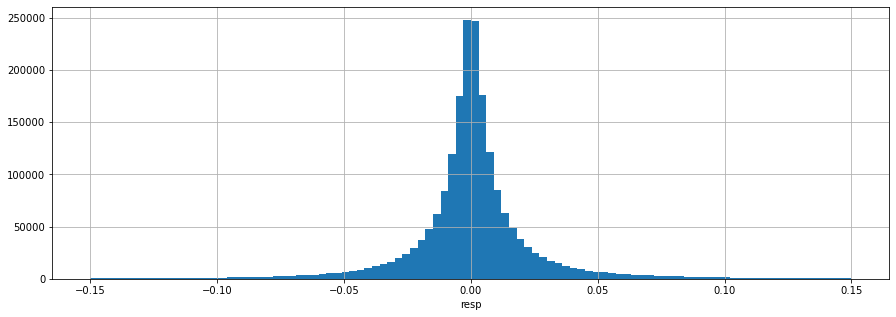

In [34]:
fig, ax = plt.subplots(figsize = (15,5))
resp = df['resp']
ax.set_xlabel('resp')
resp.hist(bins = 100, range=[-0.15, 0.15]);
del resp
gc.collect();

Ask Jonathan what distribution he thinks this is?

### Weight

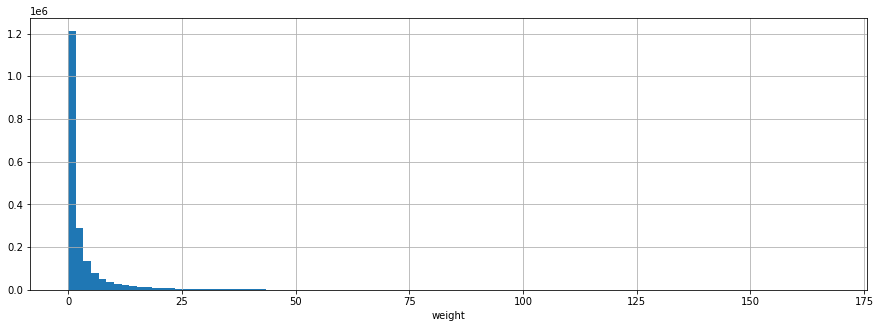

In [41]:
fig, ax = plt.subplots(figsize = (15,5))
resp = df['weight']
ax.set_xlabel('weight')
resp.hist(bins = 100);
del resp
gc.collect();

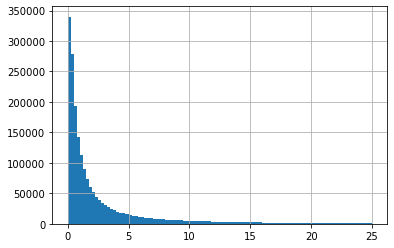

In [47]:
#fig, ax = plt.subplots(figsize = (15,5))
resp = df['weight']
ax.set_xlabel('weight')
resp.hist(bins = 100, range = [0,25]);
del resp
gc.collect();

Heavy right tail

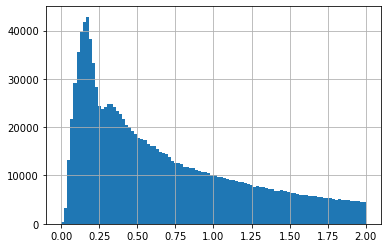

In [48]:
#fig, ax = plt.subplots(figsize = (15,5))
resp = df['weight']
ax.set_xlabel('weight')
resp.hist(bins = 100, range = [0,2]);
del resp
gc.collect();

weird jump here ask Jonathan about it

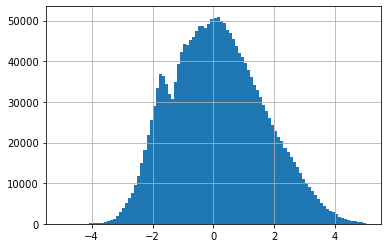

In [50]:
#fig, ax = plt.subplots(figsize = (15,5))
resp = np.log(df['weight'])
ax.set_xlabel('weight')
resp.hist(bins = 100, range = [-5,5]);
del resp
gc.collect();

the log is normalish

### Return = weight x resp

In [57]:
df['weightxresp']   = df['weight'] * df['resp']
df['weightxresp_1'] = df['weight'] * df['resp_1']
df['weightxresp_2'] = df['weight'] * df['resp_2']
df['weightxresp_3'] = df['weight'] * df['resp_3']
df['weightxresp_4'] = df['weight'] * df['resp_4']

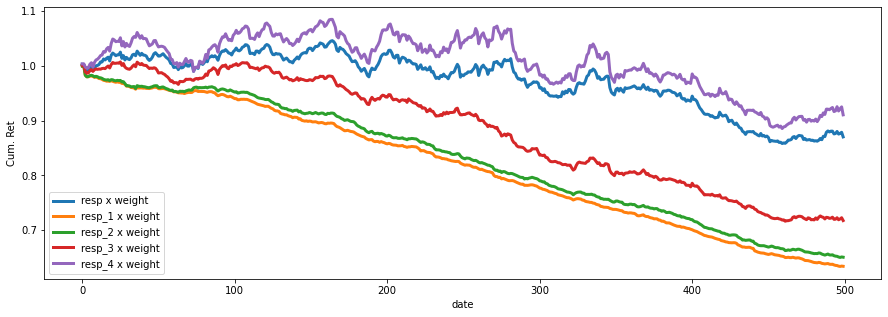

In [64]:
fig, ax = plt.subplots(figsize=(15, 5))
resp    = pd.Series(1+(df.groupby('date')['weightxresp'].mean())).cumprod()
resp_1  = pd.Series(1+(df.groupby('date')['weightxresp_1'].mean())).cumprod()
resp_2  = pd.Series(1+(df.groupby('date')['weightxresp_2'].mean())).cumprod()
resp_3  = pd.Series(1+(df.groupby('date')['weightxresp_3'].mean())).cumprod()
resp_4  = pd.Series(1+(df.groupby('date')['weightxresp_4'].mean())).cumprod()
ax.set_xlabel ("Day")
ax.set_ylabel ("Cum. Ret")
resp.plot(lw=3, label='resp x weight')
resp_1.plot(lw=3, label='resp_1 x weight')
resp_2.plot(lw=3, label='resp_2 x weight')
resp_3.plot(lw=3, label='resp_3 x weight')
resp_4.plot(lw=3, label='resp_4 x weight')
plt.legend(loc = 'lower left');            

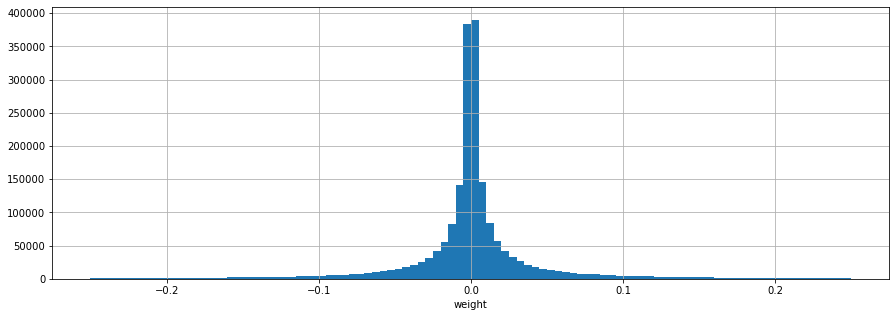

In [68]:
fig, ax = plt.subplots(figsize = (15,5))
ax.set_xlabel('weight')
df['weightxresp'].hist(bins = 100, range = [-0.25,0.25]);

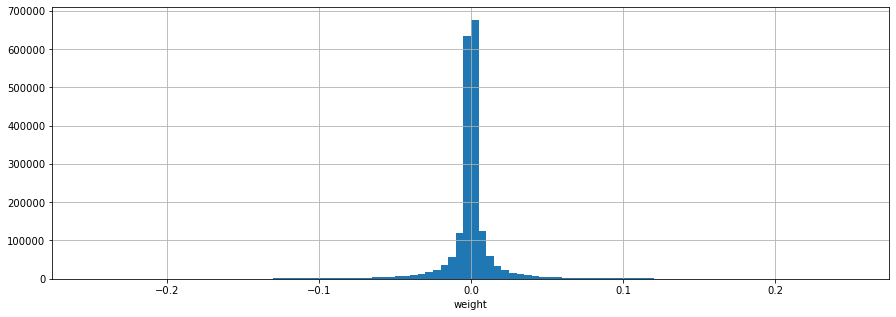

In [70]:
fig, ax = plt.subplots(figsize = (15,5))
ax.set_xlabel('weight')
df['weightxresp_1'].hist(bins = 100, range = [-0.25,0.25]);

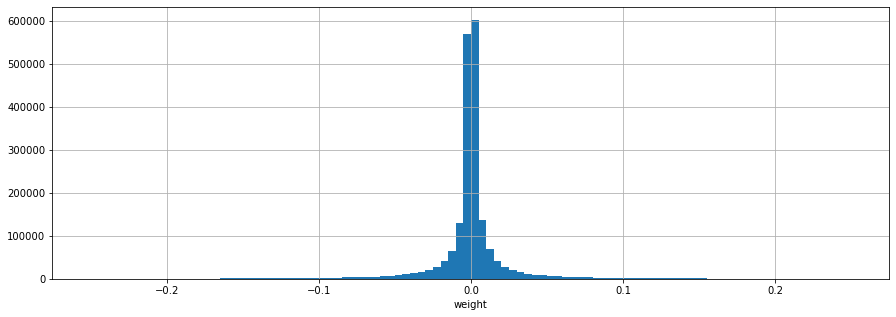

In [71]:
fig, ax = plt.subplots(figsize = (15,5))
ax.set_xlabel('weight')
df['weightxresp_2'].hist(bins = 100, range = [-0.25,0.25]);

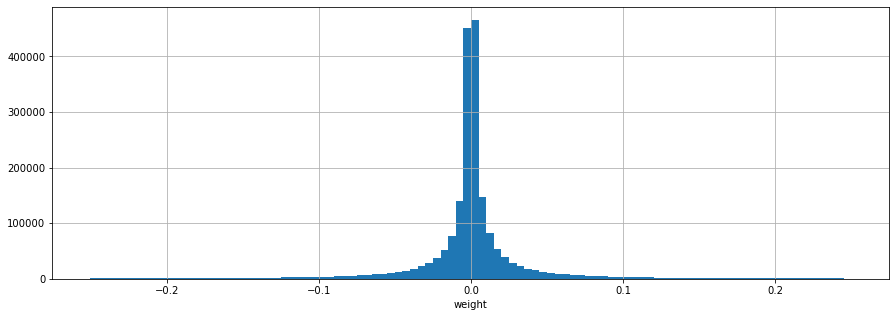

In [72]:
fig, ax = plt.subplots(figsize = (15,5))
ax.set_xlabel('weight')
df['weightxresp_3'].hist(bins = 100, range = [-0.25,0.25]);

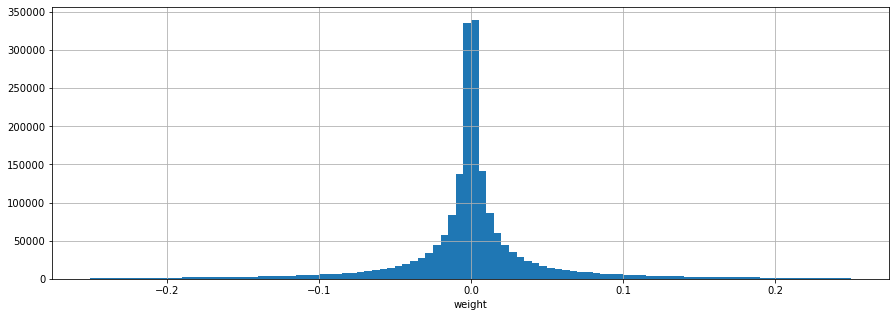

In [73]:
fig, ax = plt.subplots(figsize = (15,5))
ax.set_xlabel('weight')
df['weightxresp_4'].hist(bins = 100, range = [-0.25,0.25]);

similiar distribution across each of the resp x weight values

### Trades

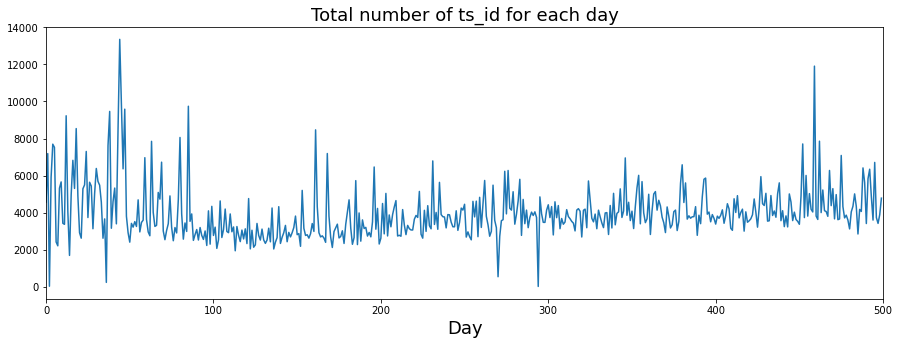

In [77]:
trades_per_day = df.groupby(['date'])['ts_id'].count()
fig, ax = plt.subplots(figsize=(15, 5))
plt.plot(trades_per_day)
ax.set_xlabel ("Day", fontsize=18)
ax.set_title ("Total number of ts_id for each day", fontsize=18)
ax.set_xlim(xmin=0)
ax.set_xlim(xmax=500)
plt.show()

/opt/anaconda3/envs/kaggle_comp/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


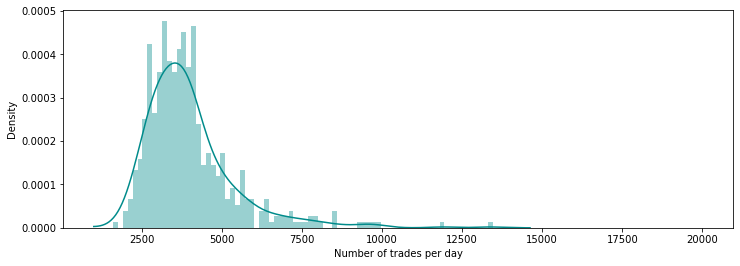

In [84]:
plt.figure(figsize = (12,4))
ax = sns.distplot(trades_per_day, 
             bins=125, 
             kde_kws={"clip":(1000,20000)}, 
             hist_kws={"range":(1000,20000)},
             color='darkcyan', 
             kde=True);
values = np.array([rec.get_height() for rec in ax.patches])
norm = plt.Normalize(values.min(), values.max())
plt.xlabel("Number of trades per day")
plt.show();